This programm is to run Exploratory Data Analysis and Data Visualization on IPL Data Set from Kaggle.

In [2]:
#To import packages needed #
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# create a function for labeling #
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

In [3]:
# read the input files and look at the top few lines #
data_path = "/Users/venkatasravankanukolanu/Documents/Data Files/ipl/"
match_df = pd.read_csv(data_path+"matches.csv")
score_df = pd.read_csv(data_path+"deliveries.csv")
list(match_df)

['id',
 'season',
 'city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'dl_applied',
 'winner',
 'win_by_runs',
 'win_by_wickets',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2',
 'umpire3']

In [4]:
list(score_df)

['match_id',
 'inning',
 'batting_team',
 'bowling_team',
 'over',
 'ball',
 'batsman',
 'non_striker',
 'bowler',
 'is_super_over',
 'wide_runs',
 'bye_runs',
 'legbye_runs',
 'noball_runs',
 'penalty_runs',
 'batsman_runs',
 'extra_runs',
 'total_runs',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

A key point to note is the 'id' from matches data set is the foreign key 'match_id' in deliveries data set. This helps us join the two data sets given

In [5]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [6]:
match_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [7]:
# Let us get some basic stats #
print("Number of matches played so far : ", match_df.shape[0])
print("Number of seasons : ", len(match_df.season.unique()))

('Number of matches played so far : ', 636)
('Number of seasons : ', 10)


I will divide the exploratory data analysis on this data into 2 stages: 
1. Analysis on match level data
2. Analysis on delivery level data

# Exploratory Data Analysis on Match level data

In [8]:
no_matches_by_year=match_df.groupby(['season']).size()
print("Number of matches by each year:",no_matches_by_year)

('Number of matches by each year:', season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
dtype: int64)


Count plot of matches by each year/season

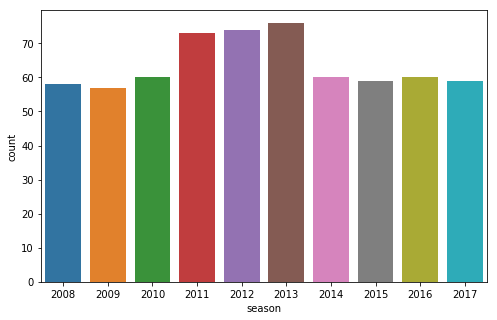

In [9]:
plt.subplots(figsize=(8,5))
sns.countplot(x='season', data=match_df)
plt.show()

Let us explore if there is any correlation b/w the no: of matches played and the no: of matches won

In [10]:
no_matches_each_team=match_df.groupby(['team1']).size()+match_df.groupby(['team2']).size()
print("Number of matches each team played:",no_matches_each_team)

('Number of matches each team played:', team1
CSK     131
DC       75
DD      147
GL       30
KKR     148
KTK      14
KXIP    148
MI      157
PW       46
RCB     152
RPS      30
RR      118
SRH      76
dtype: int64)


In [11]:
no_matches_won=match_df.groupby(['winner']).size()
print("Number of matches each team won:",no_matches_won)

('Number of matches each team won:', winner
CSK     79
DC      29
DD      62
GL      13
KKR     77
KTK      6
KXIP    70
MI      92
PW      12
RCB     73
RPS     15
RR      63
SRH     42
dtype: int64)


In [12]:
print("The correlation between matches won and matches played is",np.corrcoef(no_matches_won,no_matches_each_team)[0,1])

('The correlation between matches won and matches played is', 0.96770378719409944)


The Pearson Correlation Coefficient is 0.97, which means the correlation is positively high. This says the number of wins of a team increase as they play more matches.

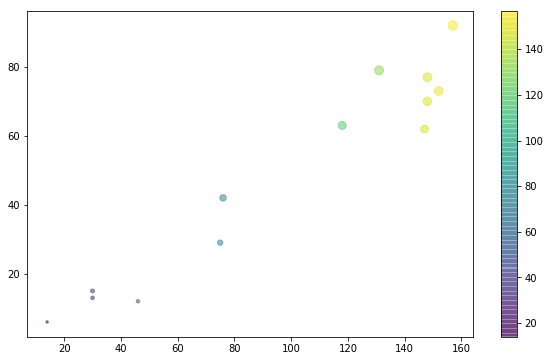

In [13]:
plt.subplots(figsize=(10,6))
colors = no_matches_each_team
sizes = no_matches_won
plt.scatter(no_matches_each_team, no_matches_won, c=colors, s=sizes, alpha=0.5,
            cmap='viridis')
plt.colorbar()  # show color scale

Lighter color circles are bigger in size while darker circles are smaller in size. This supports the high positive value of correlation coefficient computed earlier.

Let us see the if there is any relation b/w a team winning the toss and the team winning the match.

In [14]:
match_df['wintoss_match']=np.where(match_df['toss_winner']==match_df['winner'],1,0)
pd.value_counts(match_df['wintoss_match'].values, sort=False)

0    311
1    325
dtype: int64

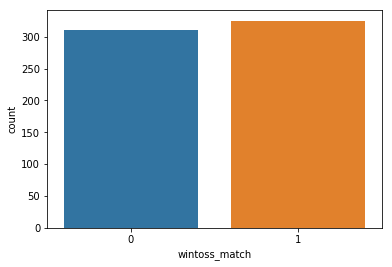

In [15]:
sns.countplot(x='wintoss_match', data=match_df)
plt.xticks(rotation='horizontal')
plt.show()

Since the number of wins are almost same for teams that won or lost the toss, we can say that toss has no effect on the result of the game.

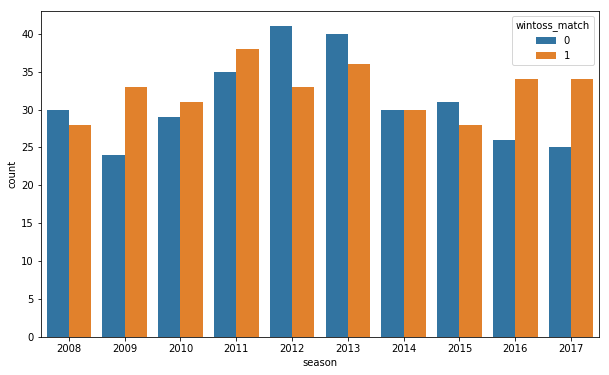

In [16]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='wintoss_match',data=match_df)
plt.show()

Since the last 2 seasons the teams winning the toss are turning out to be the match winners.

#### Toss Decisions

Let us start with the overall toss decision

In [17]:
pd.value_counts(match_df['toss_decision'].values, sort=False)

bat      273
field    363
dtype: int64

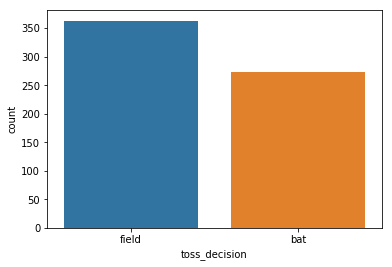

In [18]:
sns.countplot(x='toss_decision', data=match_df)
plt.xticks(rotation='horizontal')
plt.show()

More number of teams elected to field first after winning the toss. Given the shorter format of IPL matches and high scoring games, it makes sense to say that teams prefer chasing the targets thsn setting targets. Will see the toss decisions by each season.

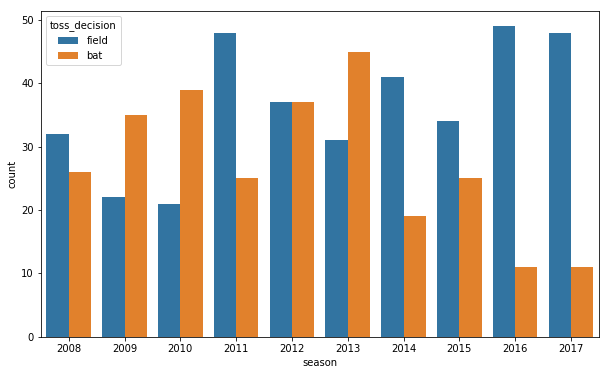

In [19]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=match_df)
plt.show()

It looks like electing to field is an emerging pattern among teams across seasons.

Since the last 2 seasons, majority of the teams winning the toss elected to field first and majority of the the teams winning the toss also won the match. Now, let us see if there is a relation between fielding first and winning the match.

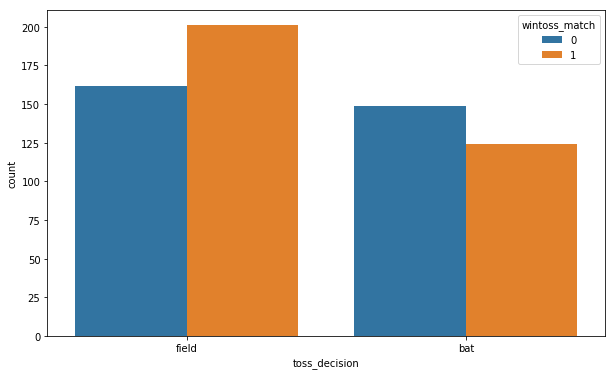

In [20]:
plt.subplots(figsize=(10,6))
sns.countplot(x='toss_decision',hue='wintoss_match',data=match_df)
plt.show()

Among teams who won the toss, teams who elected to field first won more matches than teams who elected to bat first.

### Analysis between winners, win by runs and win by wickets

In [21]:
win_avg_runs=match_df.groupby(['winner'])['win_by_runs'].mean()
win_avg_runs.sort_values(ascending=False)


winner
CSK     20.088608
MI      16.652174
RCB     16.383562
DC      14.517241
RR      13.031746
KXIP    12.314286
RPS     11.733333
KKR     11.649351
PW      11.583333
SRH     11.333333
DD       9.209677
KTK      3.833333
GL       0.076923
Name: win_by_runs, dtype: float64

CSK won by highest margin of runs when they bated first followed by MI, RCB and DC respectively.

In [22]:
win_avg_wickets=match_df.groupby(['winner'])['win_by_wickets'].mean()
win_avg_wickets.sort_values(ascending=False)

winner
KTK     5.000000
GL      5.000000
DD      4.322581
RCB     3.794521
KKR     3.779221
RR      3.698413
RPS     3.400000
KXIP    3.242857
PW      3.000000
MI      2.934783
SRH     2.785714
CSK     2.632911
DC      2.482759
Name: win_by_wickets, dtype: float64

KTK won by highest margin of wickets when they fielded first followed by GL, DD and RPS respectively.

### Analysis on favorite cities/grounds

This gives us an idea on favorite grounds, whether they are batting/bowling grounds. The field city has missing values and also there are multiple grounds/venues used in same city.

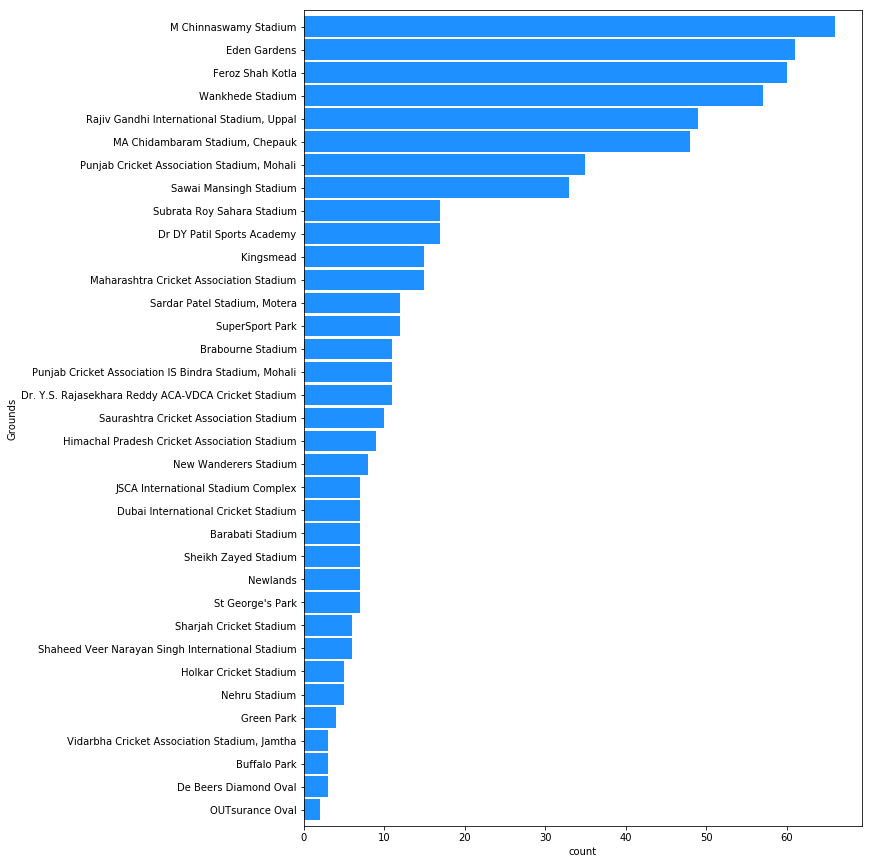

In [23]:
plt.subplots(figsize=(10,15))
ax = match_df['venue'].value_counts().sort_values(ascending=True).plot.barh(color="dodgerblue",width=.9)
ax.set_xlabel('count')
ax.set_ylabel('Grounds')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

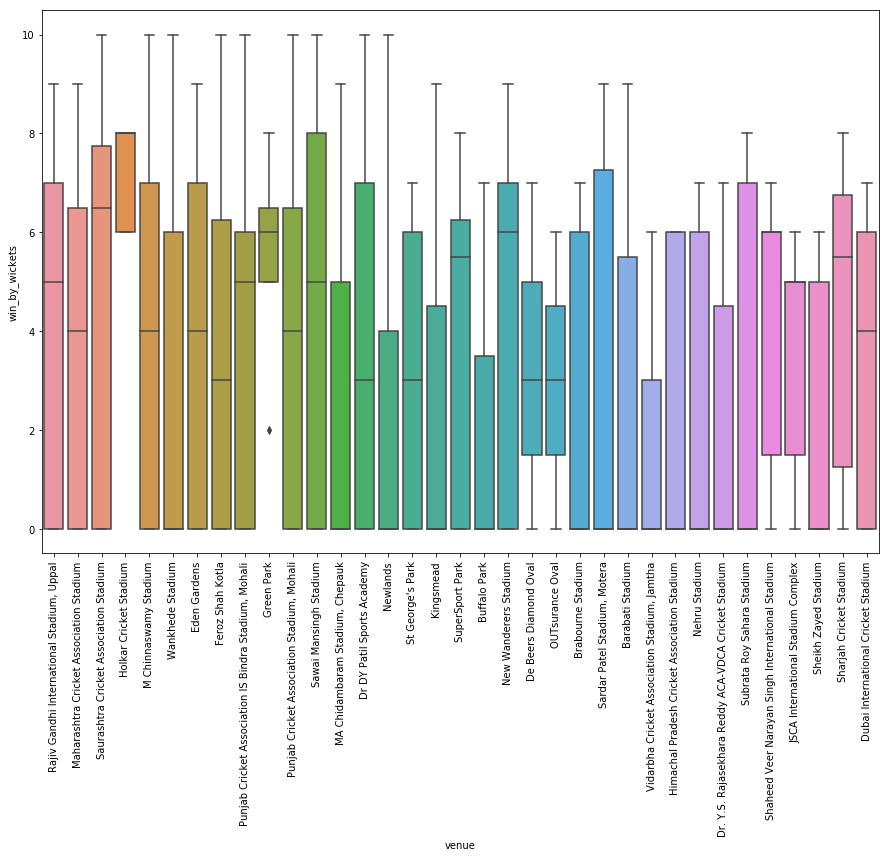

In [24]:
plt.subplots(figsize=(15,10))
sns.boxplot(x="venue", y="win_by_wickets", data=match_df)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text xticklabel objects>)

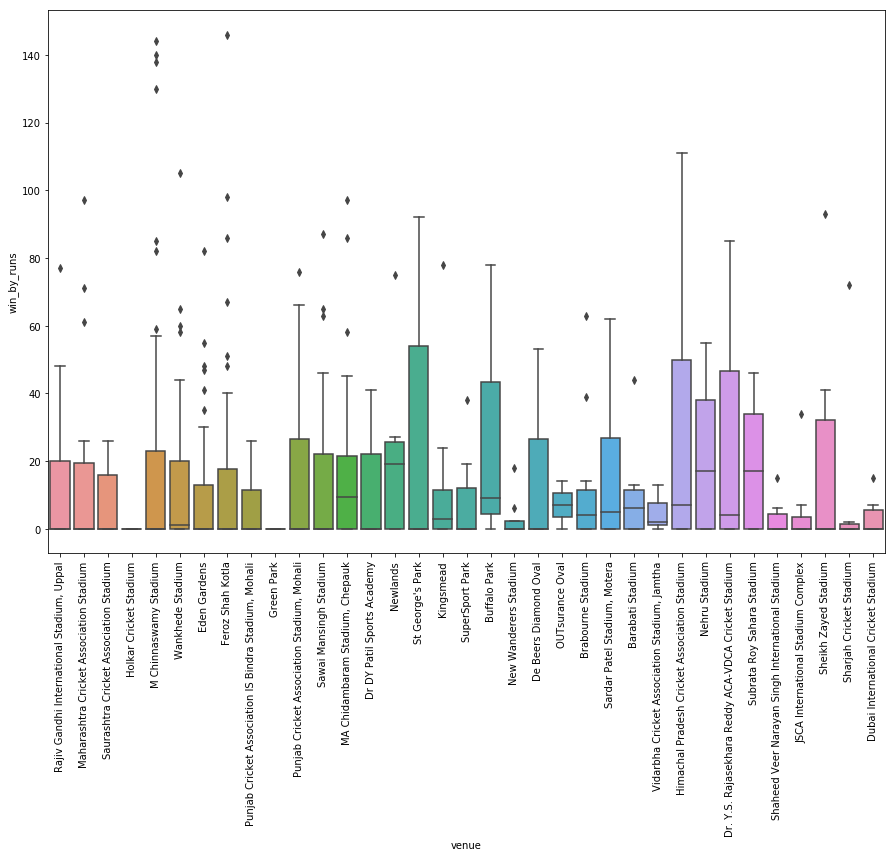

In [25]:
plt.subplots(figsize=(15,10))
sns.boxplot(x="venue", y="win_by_runs", data=match_df)
plt.xticks(rotation='vertical')

# Exploratory Data Analysis on Delivary level data


### Analysis on Batsmen

In [89]:
batsman_runs=score_df.groupby(['batsman'])['batsman_runs'].sum().reset_index()
batsman_balls=score_df.groupby(['batsman'])['ball'].count().reset_index()
batsman_fours=score_df.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
batsman_sixers=score_df.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
batsman=[batsman_runs,batsman_balls,batsman_fours,batsman_sixers]
batsman_df = reduce(lambda left,right: pd.merge(left,right,on='batsman'), batsman)
batsman_df['strikerate']=batsman_df['batsman_runs_x']/batsman_df['ball']*100
batsman_df.columns=[['batsman','balls','runs',"fours","sixers",'strike_rate']]
batsman_df.head(10)

,batsman,balls,runs,fours,sixers,strike_rate
0,A Ashish Reddy,280,196,16,15,142.857143
1,A Chandila,4,7,0,0,57.142857
2,A Chopra,53,75,7,0,70.666667
3,A Choudhary,25,20,1,1,125.000000
4,A Flintoff,62,57,5,2,108.771930
5,A Kumble,35,49,3,0,71.428571
6,A Mishra,340,382,27,5,89.005236
7,A Mithun,34,26,4,1,130.769231
8,A Mukund,19,23,1,0,82.608696
9,A Nehra,41,63,3,1,65.079365


This data set is valuable to analyze the batsmen. It can also be potentially used for feature engineering while modeling.

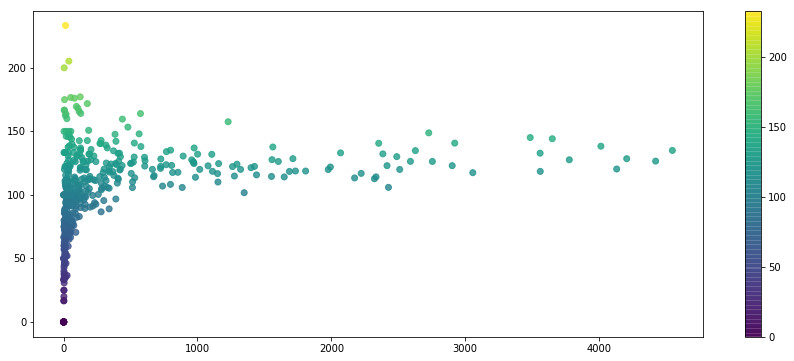

In [27]:
plt.subplots(figsize=(15,6))
colors = batsman_df['strike_rate']
#sizes = batsman_df['balls']
plt.scatter(batsman_df['balls'], batsman_df['strike_rate'], c=colors, alpha=0.8,
            cmap='viridis')
plt.colorbar()  # show color scale

It looks like there are many players who played more than 1000 balls and maintained a strike rate more than 100.

#### Top 10 Batsman in runs scored

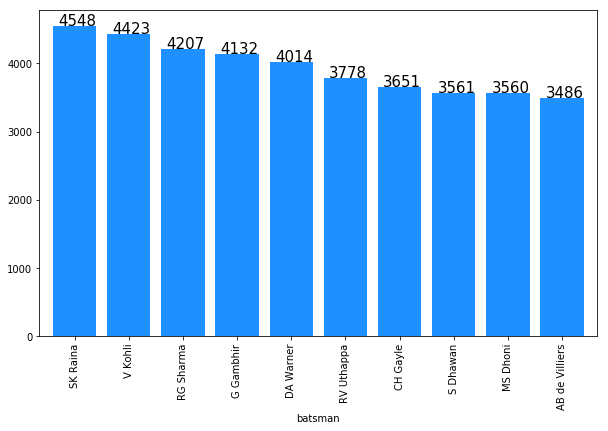

In [28]:
plt.subplots(figsize=(10,6))
runs=score_df.groupby(['batsman'])['batsman_runs'].sum()
ax=runs.sort_values(ascending=False)[:10].plot.bar(color="dodgerblue",width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+10),fontsize=15)
plt.show()

Out of the 10 top scorer batsmen, 7 are Indian batsmen. Raina, Kohli and Rohit Sharma are the top 3 top scorers.

#### Top 5 batsman with highest number of 4's and 6's

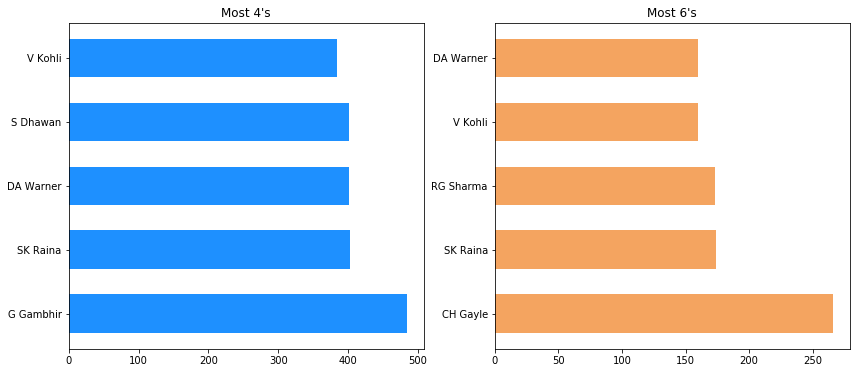

In [29]:
batsman_fours=score_df.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==4).sum())
batsman_sixers=score_df.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum())

fig,ax=plt.subplots(1,2,figsize=(14,6))
batsman_fours.sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0],color="dodgerblue",width=0.6)
ax[0].set_title("Most 4's")
ax[0].set_ylabel('')
batsman_sixers.sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1],color="sandybrown",width=0.6)
ax[1].set_title("Most 6's")
ax[1].set_ylabel('')
plt.show()

Gayle scored most number of sixers and Gambhir scored most number of fours.

#### Batsman Dismissals 

In [55]:
batsman_dismissals=score_df.groupby(['player_dismissed','dismissal_kind']).size().reset_index()
batsman_dismissals.columns=[['batsman','kind','count']]
batsman_dismissals=batsman_dismissals.pivot(index='batsman', columns='kind', values='count')
batsman_dismissals.head()

kind,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,retired hurt,run out,stumped
batsman,,,,,,,,,
A Ashish Reddy,5.0,8.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN
A Chopra,NaN,2.0,NaN,NaN,1.0,NaN,NaN,2.0,1.0
A Choudhary,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Flintoff,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
A Kumble,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


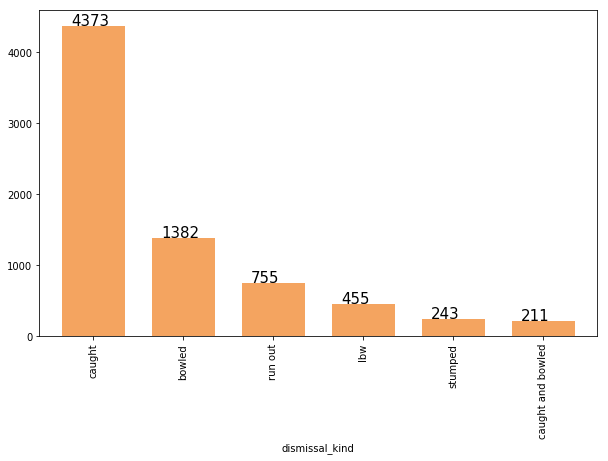

In [88]:
dismissals=score_df.groupby(['dismissal_kind']).size()
dismissals.columns=[['kind','count']]
plt.subplots(figsize=(10,6))
ax=dismissals.sort_values(ascending=False)[:6].plot.bar(color="sandybrown",width=0.7)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+10),fontsize=15)
plt.show()

Majority of the dismissals were from catches and next is bowled and run outs. IPL being a tournment with high-scoring T20 matches, majority of batsmen getting out by getting caught while trying big shots makes sense.

### Analysis on Bowlers

Let us analyze how the bowlers performed.

#### Top Wicket takers

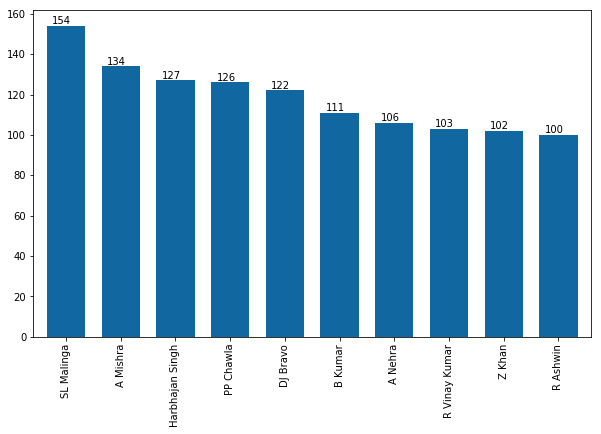

In [114]:
kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=score_df[score_df["dismissal_kind"].isin(kinds)]
plt.subplots(figsize=(10,6))
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.7,color='#1167a0')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.show()

There are 8 Indian bowlers out of top 10 highest wicket takers. Malinga is the highest wicket taker with 154 wickets.

Since we have already seen that the highest number of wickets are by catches. Now, let us see how the top 10 bowlers took wickets.

In [207]:
kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=score_df[score_df["dismissal_kind"].isin(kinds)]
top_bowler_type=ct.groupby(['bowler','dismissal_kind']).size().unstack().fillna(0)
top_bowler_type['total_wkts']=top_bowler_type.sum(axis=1)
top_bowler_type=top_bowler_type.sort_values(by='total_wkts',ascending=False)
tb=top_bowler_type[:10]
tb.head()

dismissal_kind,bowled,caught,caught and bowled,hit wicket,lbw,stumped,total_wkts
bowler,,,,,,,
SL Malinga,63.0,76.0,5.0,0.0,10.0,0.0,154.0
A Mishra,21.0,74.0,3.0,0.0,13.0,23.0,134.0
Harbhajan Singh,26.0,68.0,10.0,1.0,8.0,14.0,127.0
PP Chawla,37.0,57.0,4.0,0.0,15.0,13.0,126.0
DJ Bravo,18.0,90.0,8.0,0.0,6.0,0.0,122.0


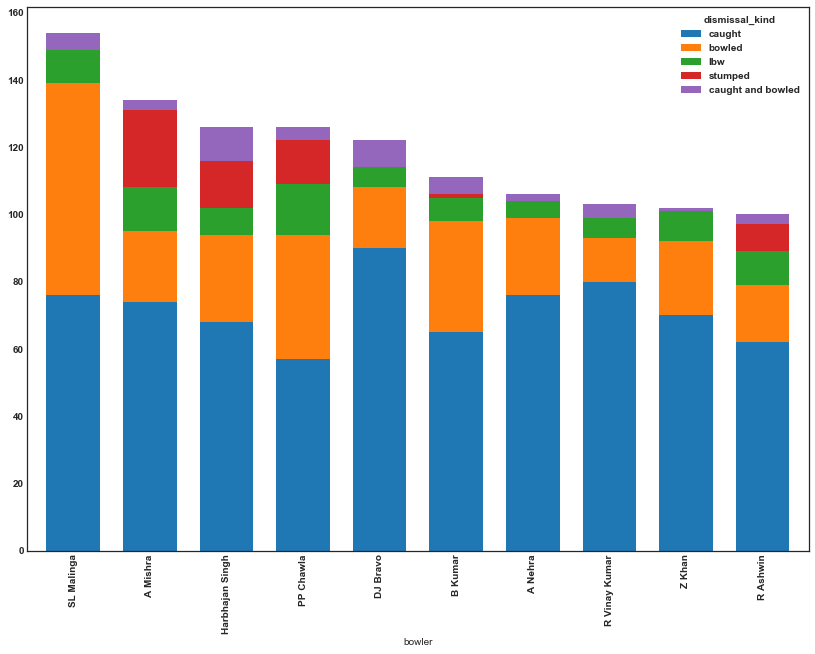

In [209]:
tb.loc[:,["caught","bowled", "lbw", "stumped", "caught and bowled"]].plot.bar(stacked=True,width=0.7, figsize=(14,10))

A very interesting observation from this graph is that stumping dismissals are happened mainly for spinners. This is one of the things you'd realize if you watch cricket frequently. 
Majority of wickets are taken as catches followed by bowled dismissals.

#### Economy Rate and Runs per Wicket

Economy rate is a standard metric in Cricket calculated as the average runs conceded per over and also let us compute average number of runs conceded per wicket taken by a bowler. The bowler with lower economy rate and low average runs per wicket can be considered to perform better.

In [201]:
runs_conceded=score_df.groupby(['bowler'])['total_runs'].sum().reset_index()
balls_bowled=score_df.groupby(['bowler']).size().reset_index()
tb=top_bowler_type.reset_index()
bowler=[tb,runs_conceded,balls_bowled]
bowler_df = reduce(lambda left,right: pd.merge(left,right,on='bowler'), bowler)
bowler_df=bowler_df.rename(columns = {0:'balls'})
bowler_df['economy_rate']=(bowler_df['total_runs']*100)/bowler_df['balls']
bowler_df['runs_per_wkt']=(bowler_df['total_runs'])/bowler_df['total_wkts']
bowler_df.head()

,bowler,bowled,caught,caught and bowled,hit wicket,lbw,stumped,total_wkts,total_runs,balls,economy_rate,runs_per_wkt
0,SL Malinga,63.0,76.0,5.0,0.0,10.0,0.0,154.0,3034,2694,112.620638,19.701299
1,A Mishra,21.0,74.0,3.0,0.0,13.0,23.0,134.0,3305,2703,122.271550,24.664179
2,Harbhajan Singh,26.0,68.0,10.0,1.0,8.0,14.0,127.0,3453,2989,115.523586,27.188976
3,PP Chawla,37.0,57.0,4.0,0.0,15.0,13.0,126.0,3315,2594,127.794911,26.309524
4,DJ Bravo,18.0,90.0,8.0,0.0,6.0,0.0,122.0,2815,2110,133.412322,23.073770


### Analysis on Death Overs(Overs 15-20)

Death overs are the overs from 15th over through 20th over. These are high scoring and also high wicket taking overs in each innings of a IPL T20 match. 
Will subset the death overs delivary level data for all the matches across seasons and analyze it.

In [225]:
death_df=score_df[score_df["over"]>=15]
death_df.head(n=2)
avg_per_ball_death=death_df['total_runs'].mean()
avg_per_ball=score_df['total_runs'].mean()
print("The average runs per ball during death overs is:",avg_per_ball_death)
print("The average runs per ball is:",avg_per_ball)

('The average runs per ball during death overs is:', 1.5164587075787737)
('The average runs per ball is:', 1.2914661704107404)


Clearly, the average runs score per balls is higher during the death over compared to the overall average. This shows that the death overs are high scoring overs.

#### Best Batsmen in Death Overs

In [213]:
death_runs=death_df.groupby(['batsman'])['batsman_runs'].sum().reset_index()
death_balls=death_df.groupby(['batsman'])['ball'].count().reset_index()
death_fours=death_df.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
death_sixers=death_df.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
death_bat=[death_runs,death_balls,death_fours,death_sixers]
death_bat_df = reduce(lambda left,right: pd.merge(left,right,on='batsman'), death_bat)
death_bat_df['strikerate']=death_bat_df['batsman_runs_x']/death_bat_df['ball']*100
death_bat_df.columns=[['batsman','balls','runs',"fours","sixers",'strike_rate']]
death_bat_df.head(10)

,batsman,balls,runs,fours,sixers,strike_rate
0,A Ashish Reddy,243,164,14,12,148.170732
1,A Chandila,4,7,0,0,57.142857
2,A Chopra,2,3,0,0,66.666667
3,A Choudhary,25,20,1,1,125.000000
4,A Flintoff,31,22,3,1,140.909091
5,A Kumble,35,46,3,0,76.086957
6,A Mishra,245,255,19,5,96.078431
7,A Mithun,20,15,2,1,133.333333
8,A Mukund,0,1,0,0,0.000000
9,A Nehra,41,63,3,1,65.079365


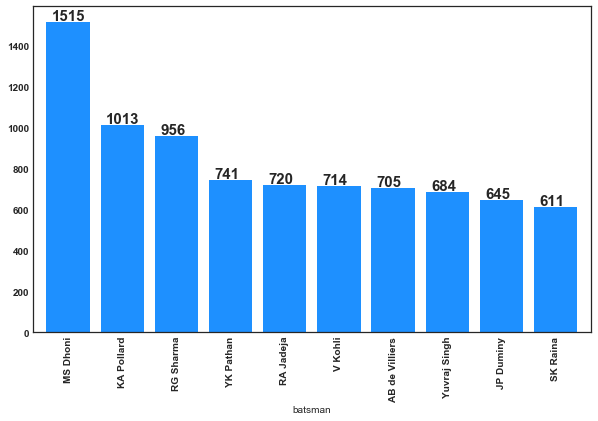

In [215]:
plt.subplots(figsize=(10,6))
runs=death_bat_df.groupby(['batsman'])['runs'].sum()
ax=runs.sort_values(ascending=False)[:10].plot.bar(color="dodgerblue",width=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+10),fontsize=15)
plt.show()

MS Dhoni is the highest scorer batsman during death overs followed by Pollard and Rohit Sharma.

#### Best Bowlers in Death Overs

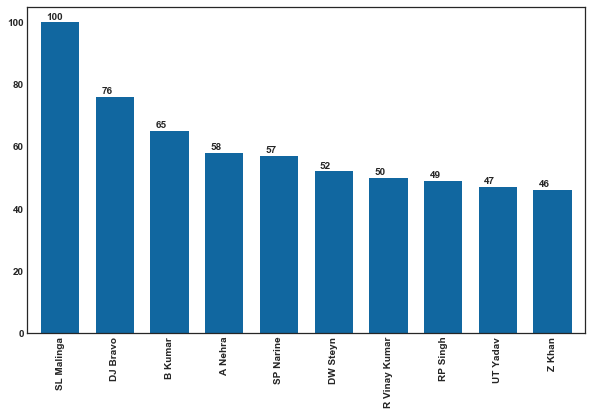

In [231]:
death_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
death_ct=death_df[death_df["dismissal_kind"].isin(death_kinds)]
plt.subplots(figsize=(10,6))
ax=death_ct['bowler'].value_counts()[:10].plot.bar(width=0.7,color='#1167a0')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.show()

9 out of 10 top wicket takes in death overs are fast bowlers. This shows most of time death overs are dominated by fast bowlers compared to spinners.

#### Economy Rate and Average Runs per Wicket

Let us compare the economy rate and average runs conceded per wicket during death over compared to the overall statistics.

In [246]:
death_economy_rate=(death_df['total_runs'].sum()*6)/death_df['bowler'].count()
economy_rate=(score_df['total_runs'].sum()*6)/score_df['bowler'].count()
print("The economy rate during death overs is:",int(death_economy_rate))
print("The overall economy rate is:",int(economy_rate))

('The economy rate during death overs is:', 9)
('The overall economy rate is:', 7)


Economy rate is higher by 2 runs per each over at 9 runs per over during death overs compared the over all economy rate of 7 runs per over.

In [255]:
kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=score_df[score_df["dismissal_kind"].isin(kinds)]
total_wickets=ct['dismissal_kind'].count()
death_ct=death_df[death_df["dismissal_kind"].isin(kinds)]
death_total_wickets=death_ct['dismissal_kind'].count()
avg_runs_per_wkt=score_df['total_runs'].sum()/total_wickets
death_avg_runs_per_wkt=death_df['total_runs'].sum()/death_total_wickets
print("The average runs per wicket during death overs is:",int(death_avg_runs_per_wkt))
print("The overall average runs per wicket is:",int(avg_runs_per_wkt))

('The average runs per wicket during death overs is:', 23)
('The overall average runs per wicket is:', 29)


The average runs per wicket during death overs is 6 runs less than the the overall average runs per wicket. This shows that the death overs are also high wicket taking overs.

This completes the exploratory data analysis and data visualization part on the IPL data. In the next part, will do predictive modeling.